In [1]:
import torch
from datasets import load_dataset
from transformers import SegGptImageProcessor, SegGptForImageSegmentation

/opt/conda/envs/seggpt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = "BAAI/seggpt-vit-large"
image_processor = SegGptImageProcessor.from_pretrained(model_id)
model = SegGptForImageSegmentation.from_pretrained(model_id)

In [27]:
from PIL import Image
import pandas as pd 

main_path = "/root/Master_Thesis/"
dataframes_path = main_path + "data/dataframes/"

# df = pd.read_csv(dataframes_path+"brain_df_train.csv")
df = pd.read_csv(dataframes_path+"fire_df.csv")
image_input = Image.open(df["images"][1]).convert("RGB")
ground_truth = Image.open(df["masks"][1]).convert("RGB")
image_prompt = Image.open(df["images"][3]).convert("RGB")
mask_prompt = Image.open(df["masks"][3]).convert("RGB")

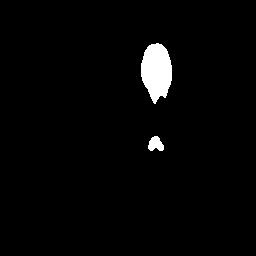

In [28]:
mask_prompt

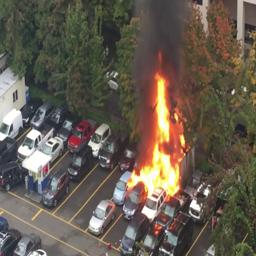

In [29]:
image_prompt

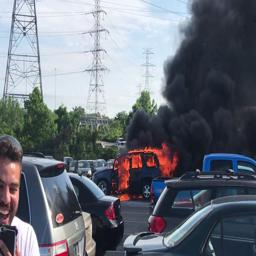

In [18]:
i=1
image = Image.open(df["images"][i])
image

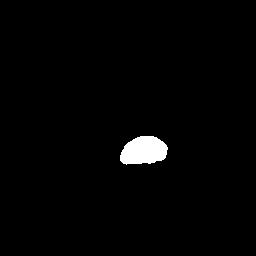

In [19]:
mask = Image.open(df["masks"][i])
mask

In [20]:
# dataset_id = "EduardoPacheco/FoodSeg103"
# ds = load_dataset(dataset_id, split="train")

# image_input = ds[4]["image"]
# ground_truth = ds[4]["label"]
# image_prompt = ds[29]["image"]
# mask_prompt = ds[29]["label"]

In [21]:
num_labels = 1

In [22]:
type(image_input)

PIL.Image.Image

In [23]:
inputs = image_processor(
    images=image_input, 
    prompt_images=image_prompt,
    prompt_masks=mask_prompt, 
    num_labels=num_labels,
    return_tensors="pt"
)

In [24]:
with torch.no_grad():
    outputs = model(**inputs)

target_sizes = [image_input.size[::-1]]
mask = image_processor.post_process_semantic_segmentation(outputs, target_sizes, num_labels=num_labels)[0]

In [25]:
mask.shape

torch.Size([256, 256])

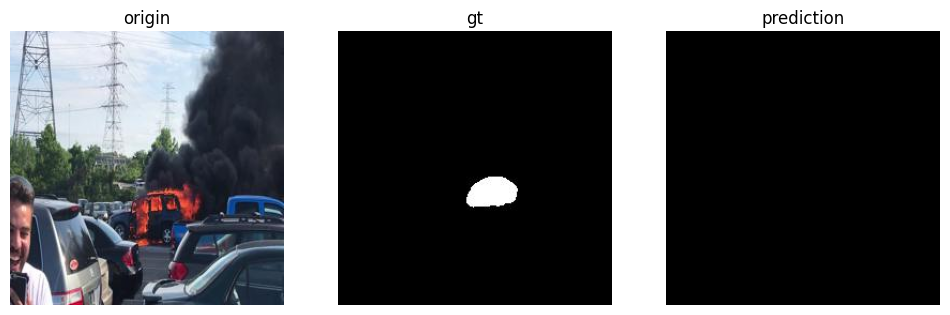

In [26]:
import supervision as sv
import cv2

image = cv2.imread(df["images"][i])
gt_mask = cv2.imread(df["masks"][i])
sv.plot_images_grid(
    images=[image, gt_mask, mask],
    grid_size=(1, 3),
    titles=['origin', 'gt', "prediction"]
)   